In [3]:
import numpy as np
import torch
import cupy as cu
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [55]:
arr = torch.zeros(100, 100, device=device)
arr[1, 1] = 1
arr

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

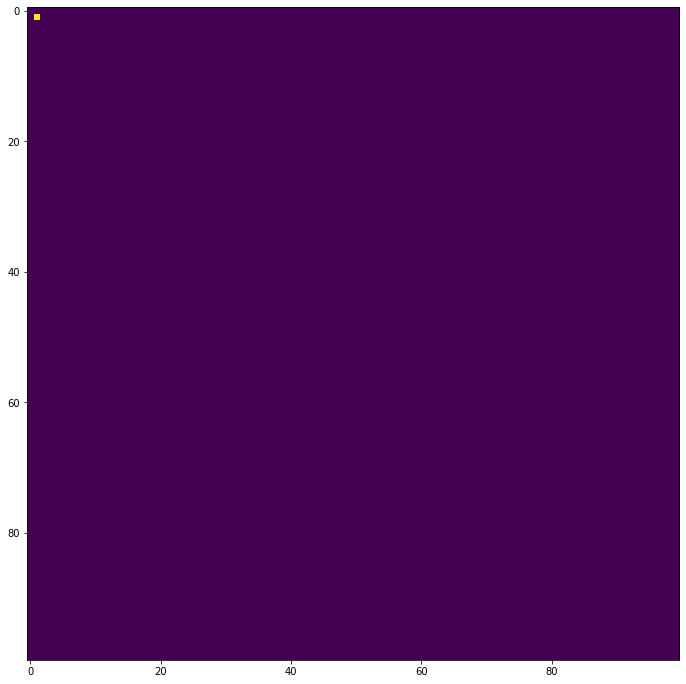

In [56]:
plt.imshow(arr.cpu().numpy())

In [57]:
cust_filter = torch.tensor([[[0, 1, 0], [0, -1, 0], [0, 0, 0]], 
                            [[0, 0, 0], [0, -1, 1], [0, 0, 0]],
                            [[0, 0, 0], [0, -1, 0], [0, 1, 0]],
                            [[0, 0, 0], [1, -1, 0], [0, 0, 0]]], device=device, dtype=torch.float)

In [58]:
cust_filter, cust_filter.shape

(tensor([[[ 0.,  1.,  0.],
          [ 0., -1.,  0.],
          [ 0.,  0.,  0.]],
 
         [[ 0.,  0.,  0.],
          [ 0., -1.,  1.],
          [ 0.,  0.,  0.]],
 
         [[ 0.,  0.,  0.],
          [ 0., -1.,  0.],
          [ 0.,  1.,  0.]],
 
         [[ 0.,  0.,  0.],
          [ 1., -1.,  0.],
          [ 0.,  0.,  0.]]], device='cuda:0'),
 torch.Size([4, 3, 3]))

In [59]:
result = torch.nn.functional.conv2d(input=arr[None, None, ...], weight=cust_filter[:, None], padding=1)
result, result.shape

(tensor([[[[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0., -1.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  1.,  0.,  ...,  0.,  0.,  0.],
           ...,
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]],
 
          [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 1., -1.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           ...,
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]],
 
          [[ 0.,  1.,  0.,  ...,  0.,  0.,  0.],
           [ 0., -1.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           ...,
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]],
 
          [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [

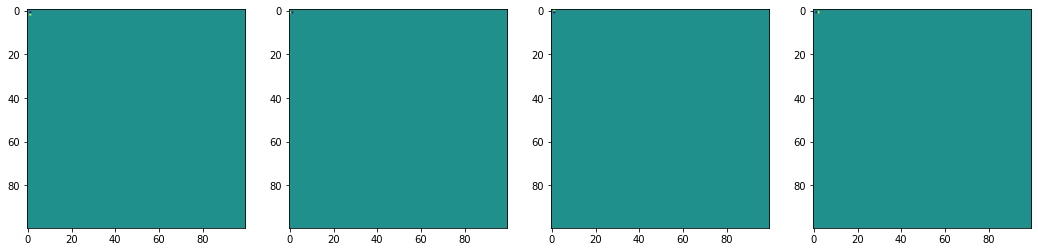

In [60]:
plt.rcParams['figure.figsize'] = [18, 12]
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(result[0, i].cpu().numpy())

In [61]:
result = result[0]

In [62]:
store = torch.ones_like(result)

In [63]:
store[:-1] += result[:-1] ** 2 + result[1:] ** 2
store[-1] +=  result[0] ** 2 + result[-1] ** 2
store = torch.sqrt(store) / 2

In [65]:
store, store.shape

(tensor([[[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.7071, 0.8660, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.7071, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          ...,
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],
 
         [[0.5000, 0.7071, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.7071, 0.8660, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          ...,
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],
 
         [[0.5000, 0.7071, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.8660, 0.7071,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000,  ...,